# App Store Games Analysis

#### To expose the best combination for strategy games available in the appstore in order to get a good user rating (4.0/5.0 and above) 

Import the numpy, pandas and data visualization libraries.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the csv file ('appstore_games.csv') with the appstore games data.

In [3]:
games = pd.read_csv('appstore_games.csv', index_col='Name')

Lets view the data using .head() and .info().

In [4]:
games.head()

,URL,ID,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
Name,,,,,,,,,,,,,,,,,
Sudoku,https://apps.apple.com/us/app/sudoku/id284921427,284921427,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11-07-2008,30-05-2017
Reversi,https://apps.apple.com/us/app/reversi/id284926400,284926400,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11-07-2008,17-05-2018
Morocco,https://apps.apple.com/us/app/morocco/id284946595,284946595,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11-07-2008,05-09-2017
Sudoku (Free),https://apps.apple.com/us/app/sudoku-free/id28...,285755462,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23-07-2008,30-05-2017
Senet Deluxe,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18-07-2008,22-07-2018


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17007 entries, Sudoku to The Three Kingdoms :Bomb
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Subtitle                      5261 non-null   object 
 3   Icon URL                      17007 non-null  object 
 4   Average User Rating           7561 non-null   float64
 5   User Rating Count             7561 non-null   float64
 6   Price                         16983 non-null  float64
 7   In-app Purchases              7683 non-null   object 
 8   Description                   17007 non-null  object 
 9   Developer                     17007 non-null  object 
 10  Age Rating                    17007 non-null  object 
 11  Languages                     16947 non-null  object 
 12  Size                          17006 non-n

Dropping all the worthless columns(almost all the columns with object data type).

In [6]:
games.drop(['URL', 'ID', 'Subtitle', 'Icon URL', 'In-app Purchases', 'Description', 'Developer', 'Languages', 'Primary Genre', 'Original Release Date'],axis = 1, inplace = True)

Remove missing values from the dataset.

In [7]:
games.dropna(inplace = True)

Cleaning the data further.

In [8]:
games = games[games['User Rating Count'] > 500]

In [9]:
games = games[games['Price']<100]

In [10]:
games['Age Rating'] = games['Age Rating'].str.rstrip('+').astype('int')

Converting String to Tuple in Genres column.

In [11]:
games['Genres'] = games.Genres.apply(lambda x: tuple(sorted(x.split(', '))))

Converting the date(string) to tuple so that it can be used in analysis(like month and year of the latest update).

In [12]:
games['Current Version Release Date'] = games['Current Version Release Date'].apply(lambda x: x[3:]).apply(lambda x: tuple(sorted(x.split('-'))))

Scaling down the columns - User Rating Count, Size.

In [13]:
games['User Rating Count'] = games['User Rating Count'].apply(lambda x: x/1000000)
games['Size'] = games['Size'].apply(lambda x: x/1048576)

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1563 entries, Sudoku to Idle Zoo Tycoon 3D
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Average User Rating           1563 non-null   float64
 1   User Rating Count             1563 non-null   float64
 2   Price                         1563 non-null   float64
 3   Age Rating                    1563 non-null   int32  
 4   Size                          1563 non-null   float64
 5   Genres                        1563 non-null   object 
 6   Current Version Release Date  1563 non-null   object 
dtypes: float64(4), int32(1), object(2)
memory usage: 91.6+ KB


In [15]:
games.head()

,Average User Rating,User Rating Count,Price,Age Rating,Size,Genres,Current Version Release Date
Name,,,,,,,
Sudoku,4.0,0.003553,2.99,4,15.119141,"(Games, Puzzle, Strategy)","(05, 2017)"
Morocco,3.0,0.008376,0.00,4,0.643555,"(Board, Games, Strategy)","(09, 2017)"
Sudoku (Free),3.5,0.190394,0.00,4,20.553711,"(Games, Puzzle, Strategy)","(05, 2017)"
Lumen Lite,3.5,0.005072,0.00,4,6.758121,"(Games, Puzzle, Strategy)","(11, 2008)"
BubblePop,3.0,0.000526,0.00,4,0.805862,"(Entertainment, Games, Strategy)","(07, 2009)"


So, here we are done with the data preprocessing. Let's start analysing our data.

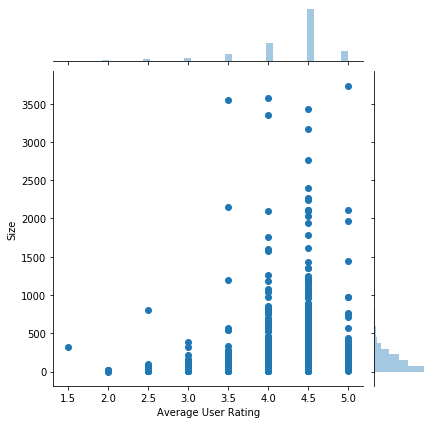

In [16]:
sns.jointplot('Average User Rating', 'Size', games)

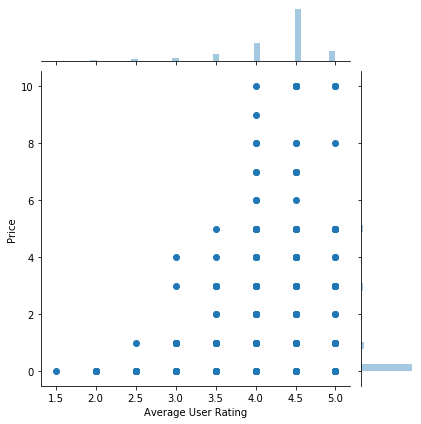

In [17]:
sns.jointplot('Average User Rating', 'Price', games)

Grouping the data by Genres to find out the best genre. 1. Sum the User Rating Count 2. Average the other Columns.

In [18]:
count = games.drop(['Price','Size','Age Rating','Average User Rating'], 1).groupby('Genres').sum()

In [19]:
games_genre = games.drop('User Rating Count',1).groupby('Genres').mean()

In [20]:
Genre_Groups = games_genre.join(count,on = 'Genres').sort_values('User Rating Count',0,False)

Cleaning the data further(removing insignificant Genres).

In [21]:
Genre_Groups = Genre_Groups[Genre_Groups['User Rating Count']>0.1]
Genre_Groups = Genre_Groups[Genre_Groups['Average User Rating']>4].reset_index()

In [22]:
Genre_Groups

,Genres,Average User Rating,Price,Age Rating,Size,User Rating Count
0,"(Action, Entertainment, Games, Strategy)",4.298295,0.764602,8.971591,226.026698,7.283026
1,"(Entertainment, Games, Simulation, Strategy)",4.345238,0.469107,7.208333,227.871063,2.668175
2,"(Action, Games, Strategy)",4.339844,0.350313,10.171875,343.709687,2.521442
3,"(Games, Simulation, Strategy)",4.393382,0.725956,8.500000,234.128633,1.687343
4,"(Games, Role Playing, Strategy)",4.415929,0.582566,10.238938,440.804103,1.268971
5,"(Entertainment, Games, Role Playing, Strategy)",4.333333,0.421707,9.325203,258.163763,1.036681
6,"(Casual, Entertainment, Games, Strategy)",4.296296,0.147407,6.740741,159.122255,0.893880
7,"(Board, Entertainment, Games, Strategy)",4.094737,1.585579,5.610526,127.158575,0.854351
8,"(Games, Puzzle, Strategy)",4.237705,0.685902,6.426230,119.739135,0.810395
9,"(Adventure, Entertainment, Games, Strategy)",4.166667,0.207500,7.291667,144.715601,0.689598


Note: As we can see some of the genres are kind of subsets of others, we can combine them. We would need to code for this.

###### From this data, We can see that 'Action, Entertainment, Games, Strategy' is the most popular Genre with 4.3 Avg User Rating.

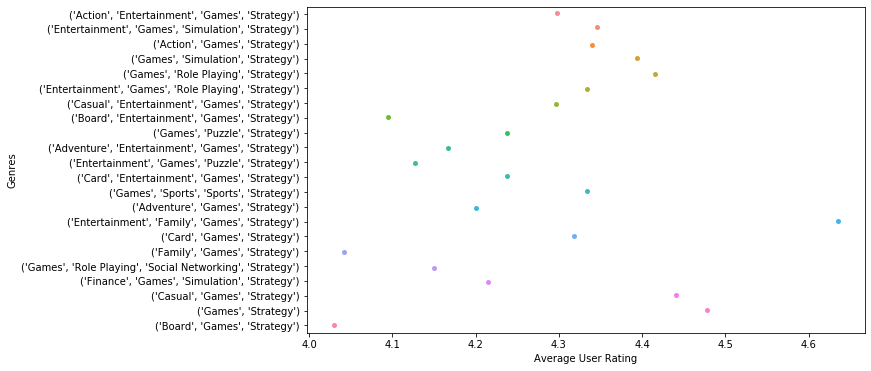

In [23]:
plt.figure(figsize=(10,6))
sns.stripplot('Average User Rating','Genres',  data = Genre_Groups)

###### Also, the top five Genres have significantly good Avg User Ratings around 4.3 to 4.5.

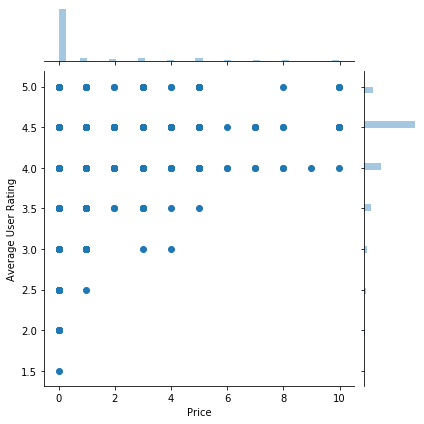

In [24]:
sns.jointplot('Price', 'Average User Rating', games)

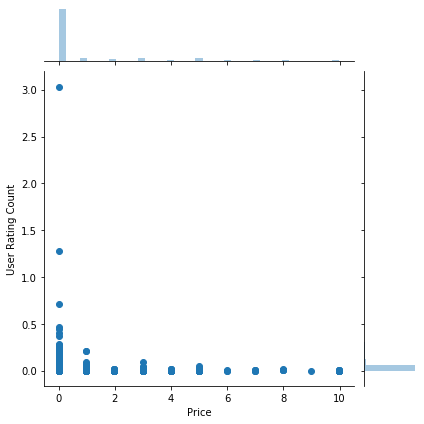

In [30]:
sns.jointplot('Price', 'User Rating Count', games)

###### from the graph above, we can observe that free or unpaid games are most popular with high ratings.

###### So we can conclude that:
1. Action Strategy games are the most popular. Simulation and Role-Playing Strategy games are also some popular genres with significant popularity.
2. The above genres have good Average User Ratings around 4.3 to 4.5.
3. Average size of the games of most popular genres is around 200MB.
4. All the popular games are free. The average price of the above genres is less than a dollar.